# 1. Password Dump Strength Analysis

Password dumps and associated wordlists are not uncommon in the cyber security world. While these wordlists, such as the popular `rockyou.txt`, are often used in training/lab environments to crack hashes or brute force logins for budding cyber analysts and penetration testers, they also serve malicious actors as well.

The purpose of this data analysis is to evaluate the strength of passwords in a password dump, how easily they may have been cracked without the dump, and what standards of password strength should be employed to stay ahead of the pack when it comes to password strength.

To get started, we will import a wordlist of passwords. The rest of this notebook will take a "wordlist agnostic" approach to writing; specifically, we will avoid making callouts on data in the markdown sections, letting graphs and the like do the heavy lifting for us.

In [1]:
import pandas as pd

wordlist = "/wordlists/rockyou.txt"

with open(wordlist,"r", errors="ignore") as f:
    df = pd.DataFrame((line.rstrip() for line in f), columns=['Password'])
    
df = df.drop_duplicates()
df = df.dropna()
print("Loaded " + str(len(df)) + " unique passwords.")

Loaded 14343856 unique passwords.


# 2. Basic Analysis and Categorization

Since we're starting with only a list of passwords, we don't have much to work with at the start. To effectively analyze these passwords, we need to conduct some basic analysis and categorization of the passwords.

For starters, we are interested in the following:
  - The length of the password.
  - The number of alpha characters in the password.
  - The number of numeric characters in the password.
  - The number of non-alphanumeric characters in the password.

In [2]:
df['Length'] = df['Password'].agg(len)
df = df.drop(df[df['Length']==0].index)

df['Alpha Count'] = df['Password'].str.count(r'[a-zA-Z]')
df['Number Count'] = df['Password'].str.count(r'[0-9]')
df['Special Count'] = df['Length'] - df['Alpha Count'] - df['Number Count']

df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Length,Alpha Count,Number Count,Special Count
count,14343855.00,14343855.00,14343855.00,14343855.00
mean,8.75,5.72,2.92,0.11
std,2.90,3.86,3.15,0.65
min,1.00,0.00,0.00,0.00
25%,7.00,3.00,0.00,0.00
50%,8.00,6.00,2.00,0.00
75%,10.00,8.00,4.00,0.00
max,285.00,255.00,255.00,255.00


The table above gives us some pretty good insight already, especially the row showing the values for the Length/Counts that are equal to or exceed those of 75% of the passwords in our word list. This 75% row in particular will help us set standards for our passwords to keep them "ahead of the game" in a later section, after some more analysis.

We can take things a step further by categorizing passwords as one of the following:

  - Alpha
  - AlphaNumeric
  - AlphaNumericSpecial
  - AlphaSpecial
  - Numeric
  - NumericSpecial
  - Special
  
Of the above, the 'AlphaNumericSpecial' category is the "most secure" in terms of what characters are used in the passwords, whereas "Numeric" is least secure due to the fewest. These levels of security are more generic attributes as they are indepedent of the length of the password.

In [3]:
df['Category'] = df['Alpha Count'].apply(lambda x: 'Alpha' * (x > 0))
df['Category'] = df['Category'] + df['Number Count'].apply(lambda x: 'Numeric' * (x > 0))
df['Category'] = df['Category'] + df['Special Count'].apply(lambda x: 'Special' * (x > 0))

df = df.sort_values('Category')
df['Category'].value_counts()

AlphaNumeric           6864624
Alpha                  4115504
Numeric                2346774
AlphaNumericSpecial     507191
AlphaSpecial            457465
NumericSpecial           46542
Special                   5755
Name: Category, dtype: int64

# 3. Length-Based Analysis

Instead of attempting character-based frequency analysis, we are going to look at the overall number of character types (alpha, numeric, special) and visualize their values in the various categories. For the purposes of this analysis, we are not concerned with outliers.

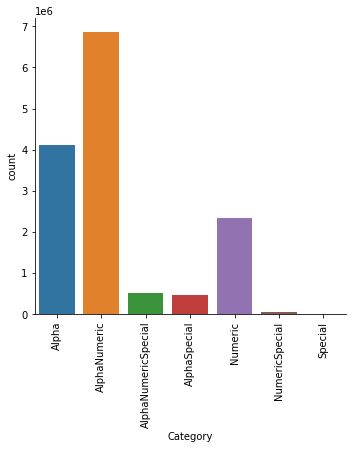

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x='Category', data=df, kind="count")
plt.xticks(rotation='vertical')
plt.show()

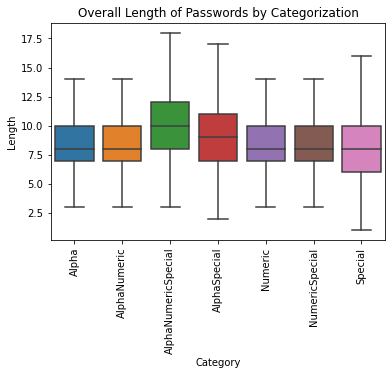

In [5]:
ax = sns.boxplot(x='Category', y='Length', data=df, showfliers=False)
ax.set_title("Overall Length of Passwords by Categorization")
plt.xticks(rotation='vertical')
plt.show()

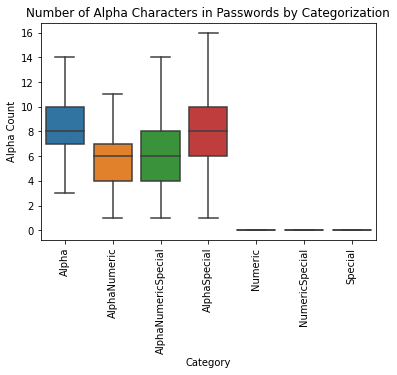

In [6]:
ax = sns.boxplot(x='Category', y='Alpha Count', data=df, showfliers=False)
ax.set_title("Number of Alpha Characters in Passwords by Categorization")
plt.xticks(rotation='vertical')
plt.show()

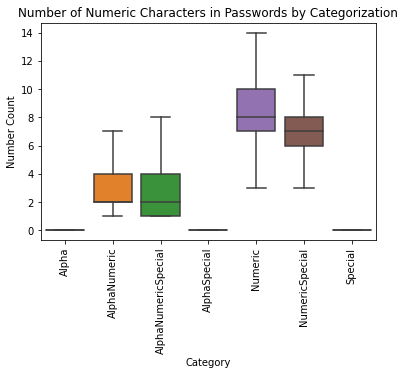

In [7]:
ax = sns.boxplot(x='Category', y='Number Count', data=df, showfliers=False)
ax.set_title("Number of Numeric Characters in Passwords by Categorization")
plt.xticks(rotation='vertical')
plt.show()

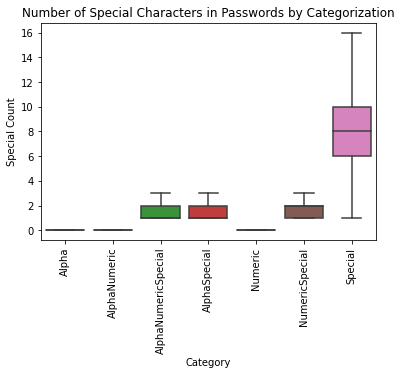

In [8]:
ax = sns.boxplot(x='Category', y='Special Count', data=df, showfliers=False)
ax.set_title("Number of Special Characters in Passwords by Categorization")
plt.xticks(rotation='vertical')
plt.show()

# 4. Exceeding Common Password Strengths Based on Quantiles

Since malicious threat actors may use this same information to tailor their password cracking attempts, we want to increase our own password strengths to avoid these attempts. To effectively do so, we should ideally use passwords that would be categorized as AlphaNumericSpecial, but there may be situations where one of the less secure categorizations are required of us.

Taking a categorization-agnostic approach, it stands to reason that having a password with character counts that exceed 90%, 95%, or even 99% of the character counts relative to those in the password wordlist gives our own password an advantage over the "common" password strengths.

Before getting into category-based quantiles, we will look at the overall quantiles in 5% increments:

In [9]:
df.quantile([.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95,.99])

,Length,Alpha Count,Number Count,Special Count
0.05,6.0,0.0,0.0,0.0
0.10,6.0,0.0,0.0,0.0
0.15,6.0,0.0,0.0,0.0
0.20,7.0,2.0,0.0,0.0
0.25,7.0,3.0,0.0,0.0
0.30,7.0,4.0,0.0,0.0
0.35,8.0,5.0,1.0,0.0
0.40,8.0,5.0,1.0,0.0
0.45,8.0,6.0,2.0,0.0
0.50,8.0,6.0,2.0,0.0


## 4.1 Alpha Categorized Passwords

In [10]:
df[df['Category']=="Alpha"].quantile([.9,.95,.99])

,Length,Alpha Count,Number Count,Special Count
0.90,12.0,12.0,0.0,0.0
0.95,14.0,14.0,0.0,0.0
0.99,16.0,16.0,0.0,0.0


## 4.2 AlphaNumeric Categorized Passwords

In [11]:
df[df['Category']=="AlphaNumeric"].quantile([.9,.95,.99])

,Length,Alpha Count,Number Count,Special Count
0.90,11.0,9.0,6.0,0.0
0.95,13.0,10.0,6.0,0.0
0.99,16.0,12.0,9.0,0.0


## 4.3 AlphaNumericSpecial Categorized Passwords (MOST PREFERRED)

In [12]:
df[df['Category']=="AlphaNumericSpecial"].quantile([.9,.95,.99])

,Length,Alpha Count,Number Count,Special Count
0.90,15.0,10.0,5.0,2.0
0.95,16.0,12.0,6.0,3.0
0.99,24.0,18.0,9.0,5.0


## 4.4 AlphaSpecial Categorized Passwords

In [13]:
df[df['Category']=="AlphaSpecial"].quantile([.9,.95,.99])

,Length,Alpha Count,Number Count,Special Count
0.90,14.0,12.0,0.0,3.0
0.95,16.0,15.0,0.0,3.0
0.99,24.0,21.0,0.0,6.0


## 4.5 Numeric Categorized Passwords (LEAST PREFERRED)

In [14]:
df[df['Category']=="Numeric"].quantile([.9,.95,.99])

,Length,Alpha Count,Number Count,Special Count
0.90,10.0,0.0,10.0,0.0
0.95,11.0,0.0,11.0,0.0
0.99,14.0,0.0,14.0,0.0


## 4.6 Numeric Categorized Passwords

In [15]:
df[df['Category']=="NumericSpecial"].quantile([.9,.95,.99])

,Length,Alpha Count,Number Count,Special Count
0.90,12.0,0.0,10.0,3.0
0.95,14.0,0.0,12.0,4.0
0.99,17.0,0.0,15.0,8.0


## 4.7 Alpha Categorized Passwords

In [16]:
df[df['Category']=="Special"].quantile([.9,.95,.99])

,Length,Alpha Count,Number Count,Special Count
0.90,12.0,0.0,0.0,12.0
0.95,14.0,0.0,0.0,14.0
0.99,26.0,0.0,0.0,26.0
